In [26]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [27]:
# Load a CSV file into a DataFrame

# set the path to your path and filename

csv_file = 'Crime_Data_from_2020_to_Present.csv'

df = pd.read_csv(csv_file)

# Display the frst few rows of the DataFrame
print(df.head())

       DR_NO               Date Rptd                DATE OCC  TIME OCC  AREA  \
0   10304468  01/08/2020 12:00:00 AM  01/08/2020 12:00:00 AM      2230     3   
1  190101086  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM       330     1   
2  200110444  04/14/2020 12:00:00 AM  02/13/2020 12:00:00 AM      1200     1   
3  191501505  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM      1730    15   
4  191921269  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM       415    19   

     AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0    Southwest          377         2     624   
1      Central          163         2     624   
2      Central          155         2     845   
3  N Hollywood         1543         2     745   
4      Mission         1998         2     740   

                                         Crm Cd Desc  ... Status  \
0                           BATTERY - SIMPLE ASSAULT  ...     AO   
1                           BATTERY - SIMPLE ASSAULT  ...     IC   
2          SEX OFFEN

In [28]:
# Select the relevant features (columns) for your prediction
features = ['Date Rptd']
target = 'Crm Cd'

In [32]:
# Split the data into features and target
X = df.drop('DR_NO', axis=1)
y = df['DR_NO']

# Extract the features and target variable
X = df[features]
y = df[target]

In [33]:
# Encode 'Date Rptd' using Label Encoding
le = LabelEncoder()
X['Date Rptd'] = le.fit_transform(X['Date Rptd'])

C:\Users\namortel\AppData\Local\Temp\ipykernel_4240\2789602336.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Date Rptd'] = le.fit_transform(X['Date Rptd'])


In [34]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
# Reshape the input data to 3D for LSTM (batch size, time steps, features)
X_train = np.array(X_train).reshape(-1, 1, X_train.shape[1])
X_test = np.array(X_test).reshape(-1, 1, X_test.shape[1])

In [36]:
# Build an LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.Dense(1)
])

In [37]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [38]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
20292/20292 [==============================] - 134s 6ms/step - loss: 86051.3203 - val_loss: 43337.8711
Epoch 2/10
20292/20292 [==============================] - 122s 6ms/step - loss: 43175.1836 - val_loss: 43340.5352
Epoch 3/10
20292/20292 [==============================] - 148s 7ms/step - loss: 43158.4531 - val_loss: 43333.4766
Epoch 4/10
20292/20292 [==============================] - 153s 8ms/step - loss: 43154.3594 - val_loss: 43331.0391
Epoch 5/10
20292/20292 [==============================] - 177s 9ms/step - loss: 43149.6602 - val_loss: 43331.0078
Epoch 6/10
20292/20292 [==============================] - 639s 31ms/step - loss: 43148.9375 - val_loss: 43332.1992
Epoch 7/10
20292/20292 [==============================] - 771s 38ms/step - loss: 43149.2266 - val_loss: 43329.1523
Epoch 8/10
20292/20292 [==============================] - 285s 14ms/step - loss: 43155.9570 - val_loss: 43329.9922
Epoch 9/10
20292/20292 [==============================] - 87s 4ms/step - loss: 43149.

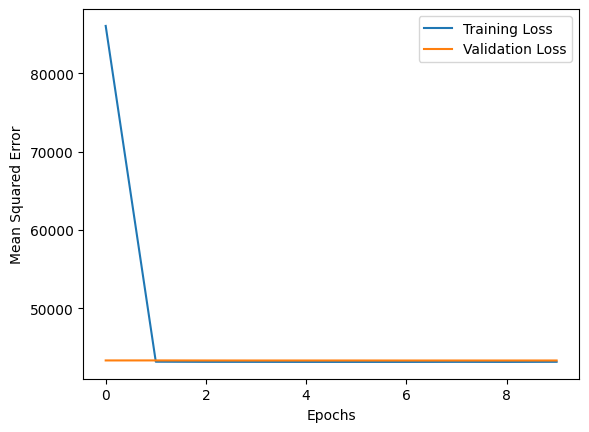

In [40]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()